### Import packages and data and set up environment

In [1]:
import skfda
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from skfda.exploratory.depth import ModifiedBandDepth, IntegratedDepth
from skfda.exploratory.visualization import Boxplot

from skfda.exploratory.visualization.clustering import (
    ClusterMembershipLinesPlot,
    ClusterMembershipPlot,
    ClusterPlot,
)
from skfda.ml.clustering import FuzzyCMeans, KMeans

from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial


In [2]:
def wf(x):
    return '/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Raw/' + x

In [3]:
V_GRF = pd.read_csv(wf('V_GRF_stance_N.csv'), header = None)
ML_GRF = pd.read_csv(wf('ML_GRF_stance_N.csv'), header = None)
AP_GRF = pd.read_csv(wf('AP_GRF_stance_N.csv'), header = None)

In [4]:
#Defining a list of grid points
grid_points_100 = list(range(1,101))
grid_points_2990 = list(range(1,2991))

### Create the data into an skfda object

In [5]:
#Creating an skfda object ML_GRF
ML_GRF_matrix = ML_GRF.to_numpy()

ML_GRF_fd = skfda.FDataGrid(
    data_matrix=ML_GRF_matrix,
    grid_points=grid_points_100,
)

In [6]:
#Creating an skfda object AP_GRF
AP_GRF_matrix = AP_GRF.to_numpy()

AP_GRF_fd = skfda.FDataGrid(
    data_matrix=AP_GRF_matrix,
    grid_points=grid_points_100,
)

In [7]:
#Creating an skfda object V_GRF
V_GRF_matrix = V_GRF.to_numpy()

V_GRF_fd = skfda.FDataGrid(
    data_matrix=V_GRF_matrix,
    grid_points=grid_points_100,
)

### BSplines representation

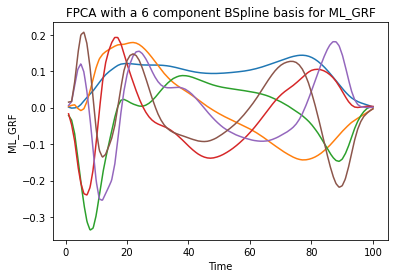

In [8]:
# Medial Lateral

ML_GRF_fpca_bs = FPCA(n_components=6)
ML_GRF_fpca_bs.fit(ML_GRF_fd)
ML_GRF_fpca_bs.components_.plot()
plt.xlabel('Time')
plt.ylabel('ML_GRF')
plt.title('FPCA with a 6 component BSpline basis for ML_GRF')
plt.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/Plots/FPCA_ML_GRF_plot.png', dpi=300)


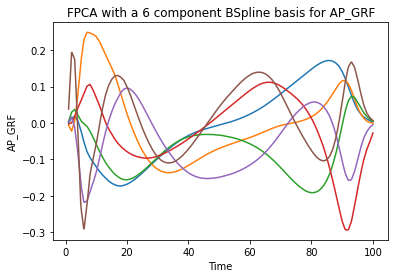

In [9]:
# Anterior Posterior

AP_GRF_fpca_bs = FPCA(n_components=6)
AP_GRF_fpca_bs.fit(AP_GRF_fd)
AP_GRF_fpca_bs.components_.plot()
plt.xlabel('Time')
plt.ylabel('AP_GRF')
plt.title('FPCA with a 6 component BSpline basis for AP_GRF')
plt.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/Plots/FPCA_AP_GRF_plot.png', dpi=300)


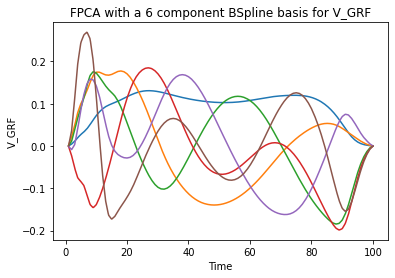

In [10]:
# Vertical

V_GRF_fpca_bs = FPCA(n_components=6)
V_GRF_fpca_bs.fit(V_GRF_fd)
V_GRF_fpca_bs.components_.plot()
plt.xlabel('Time')
plt.ylabel('V_GRF')
plt.title('FPCA with a 6 component BSpline basis for V_GRF')
plt.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/Plots/FPCA_V_GRF_plot.png', dpi=300)


### Explained Variance Ratio

In [31]:
# Explained Variance ratio

ML_GRF_fpca = FPCA(n_components=2)
ML_GRF_fpca.fit(ML_GRF_fd)

R_AP_GRF = str(round(sum(ML_GRF_fpca.explained_variance_ratio_), 2))
R_ML_GRF = str(round(sum(AP_GRF_fpca.explained_variance_ratio_), 2))
R_V_GRF = str(round(sum(V_GRF_fpca.explained_variance_ratio_), 2))

# Store values
new = pd.DataFrame({'Components' : [2], 
                        'R_ML': [R_ML_GRF],
                        'R_AP': [R_AP_GRF],
                        'R_V': [R_V_GRF],
                       })

R_GRF = new

In [32]:
# create a loop that runs the above process all over again
# run the model, find variance explanation ratio and adds it to our dataset

for k in range(4, 12, 2):

    # Medial Lateral
    ML_GRF_fpca = FPCA(n_components=k)
    ML_GRF_fpca.fit(ML_GRF_fd)

    # Anterior Posterior

    AP_GRF_fpca = FPCA(n_components=k)
    AP_GRF_fpca.fit(AP_GRF_fd)
    
    # Vertical 

    V_GRF_fpca = FPCA(n_components=k)
    V_GRF_fpca.fit(V_GRF_fd)

    # Calculate rations
    
    R_AP_GRF = str(round(sum(ML_GRF_fpca.explained_variance_ratio_), 2))
    R_ML_GRF = str(round(sum(AP_GRF_fpca.explained_variance_ratio_), 2))
    R_V_GRF = str(round(sum(V_GRF_fpca.explained_variance_ratio_), 2))

    # Store values
    new = pd.DataFrame({'Components' : [k], 
                        'R_ML': [R_ML_GRF],
                        'R_AP': [R_AP_GRF],
                        'R_V': [R_V_GRF],
                       })

    
    R_GRF = pd.concat([R_GRF, new])

In [33]:
R_GRF

,Components,R_ML,R_AP,R_V
0,2,0.98,0.77,1.0
0,4,0.88,0.88,0.96
0,6,0.94,0.94,0.98
0,8,0.96,0.96,0.99
0,10,0.98,0.97,1.0


In [34]:
R_GRF.to_csv('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/Tables/FPCA_Variance_Ratios.csv')

### Create scatter matrix

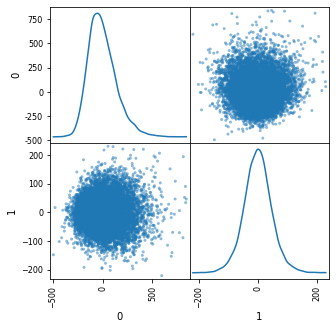

In [14]:
# Medial Lateral

# Compute the scores
ML_GRF_fpca = FPCA(n_components=2)
ML_GRF_fpca.fit(ML_GRF_fd)
ML_GRF_proj = ML_GRF_fpca.transform(ML_GRF_fd)

# Plot the projection of the data onto the eigenfunctions
fig = pd.plotting.scatter_matrix(pd.DataFrame(ML_GRF_proj), diagonal='kde', figsize=(5, 5))
plt.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_ML_GRF_scatter_matrix.png', dpi=300)

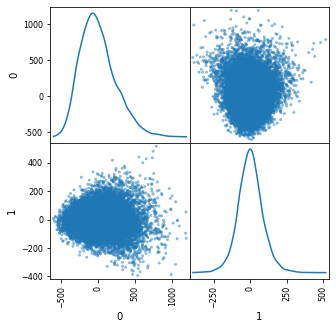

In [15]:
# Anterior Posterior

# Compute the scores
AP_GRF_fpca = FPCA(n_components=2)
AP_GRF_fpca.fit(AP_GRF_fd)
AP_GRF_proj = AP_GRF_fpca.transform(AP_GRF_fd)

# Plot the projection of the data onto the eigenfunctions
fig = pd.plotting.scatter_matrix(pd.DataFrame(AP_GRF_proj), diagonal='kde', figsize=(5, 5))
plt.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_AP_GRF_scatter_matrix.png', dpi=300)

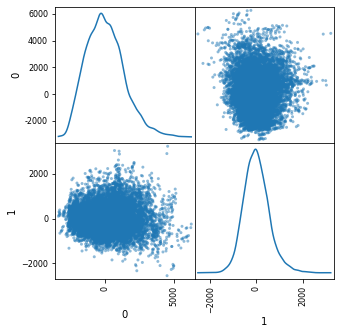

In [16]:
# Vertical

# Compute the scores
V_GRF_fpca = FPCA(n_components=2)
V_GRF_fpca.fit(V_GRF_fd)
V_GRF_proj = V_GRF_fpca.transform(V_GRF_fd)

# Plot the projection of the data onto the eigenfunctions
fig = pd.plotting.scatter_matrix(pd.DataFrame(V_GRF_proj), diagonal='kde', figsize=(5, 5))
plt.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_V_GRF_scatter_matrix.png', dpi=300)

### Create plots for reconstructed GRF datasets

 /var/folders/3f/jf0vyw7d5dz_ypqzwp3mnylm0000gn/T/ipykernel_81455/31652310.py:6: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


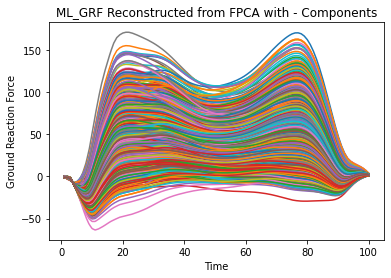

In [16]:
# Medial Lateral

ML_GRF_reconst = ML_GRF_fpca.inverse_transform(ML_GRF_proj)

fig = ML_GRF_reconst.plot()
fig.show()
plt.title("ML_GRF Reconstructed from FPCA with - Components")
plt.xlabel("Time")
plt.ylabel("Ground Reaction Force")
fig.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_ML_GRF_reconstructed_plot.png', dpi=300)


 /var/folders/3f/jf0vyw7d5dz_ypqzwp3mnylm0000gn/T/ipykernel_81455/453244306.py:6: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


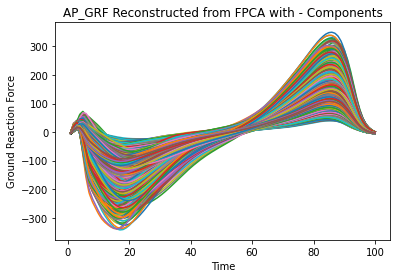

In [17]:
# Anterior Posterior

AP_GRF_reconst = AP_GRF_fpca.inverse_transform(AP_GRF_proj)

fig = AP_GRF_reconst.plot()
fig.show()
plt.title("AP_GRF Reconstructed from FPCA with - Components")
plt.xlabel("Time")
plt.ylabel("Ground Reaction Force")
fig.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_AP_GRF_reconstructed_plot.png', dpi=300)


 /var/folders/3f/jf0vyw7d5dz_ypqzwp3mnylm0000gn/T/ipykernel_81455/3258613893.py:6: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


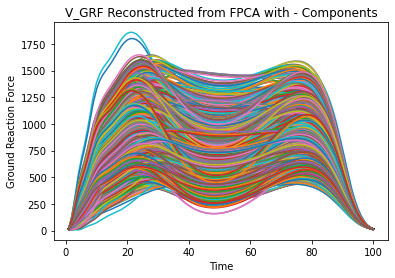

In [18]:
# Vertical

V_GRF_reconst = V_GRF_fpca_bs.inverse_transform(V_GRF_proj)

fig = V_GRF_reconst.plot()
fig.show()
plt.title("V_GRF Reconstructed from FPCA with - Components")
plt.xlabel("Time")
plt.ylabel("Ground Reaction Force")
fig.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_V_GRF_reconstructed_plot.png', dpi=300)


### Calculate MSE

In [8]:
# Define function for MSE

def mse(array1,array2):
    diff = array1 - array2
    sqdiff = diff**2
    n = len(sqdiff)
    sum_sqdiff = sum(sqdiff)
    return sum_sqdiff/n

In [9]:
# define basis

basis = 'Fourier'

In [10]:
# run model

ML_GRF_fpca = FPCA(n_components=2)
ML_GRF_fpca.fit(ML_GRF_fd)
ML_GRF_reconst = ML_GRF_fpca.inverse_transform(ML_GRF_fpca.transform(ML_GRF_fd))

test = pd.DataFrame()

for i in range(0, 15696):

        row = pd.DataFrame(ML_GRF_reconst.data_matrix[i]).transpose()
        frames = [test, row]
        test = pd.concat(frames) if not test is None else test
                                  
ML_GRF_reconst_array = test.values.flatten()

ML_GRF_df = pd.DataFrame(ML_GRF.values)
ML_GRF_array = ML_GRF_df.values.flatten()

# Anterior Posterior

AP_GRF_fpca = FPCA(n_components=2)
AP_GRF_fpca.fit(AP_GRF_fd)
AP_GRF_reconst = AP_GRF_fpca.inverse_transform(AP_GRF_fpca.transform(AP_GRF_fd))

test = pd.DataFrame()

for i in range(0, 15696):

        row = pd.DataFrame(AP_GRF_reconst.data_matrix[i]).transpose()
        frames = [test, row]
        test = pd.concat(frames) if not test is None else test
                                  
AP_GRF_reconst_array = test.values.flatten()

AP_GRF_df = pd.DataFrame(AP_GRF.values)
AP_GRF_array = AP_GRF_df.values.flatten()

# Vertical 

V_GRF_fpca = FPCA(n_components=2)
V_GRF_fpca.fit(V_GRF_fd)
V_GRF_reconst = V_GRF_fpca.inverse_transform(V_GRF_fpca.transform(V_GRF_fd))

test = pd.DataFrame()

for i in range(0, 15696):

        row = pd.DataFrame(V_GRF_reconst.data_matrix[i]).transpose()
        frames = [test, row]
        test = pd.concat(frames) if not test is None else test
                                  
V_GRF_reconst_array = test.values.flatten()

V_GRF_df = pd.DataFrame(V_GRF.values)
V_GRF_array = V_GRF_df.values.flatten()

In [11]:
# calculate mse

mse_AP_GRF = str(round(mse(AP_GRF_array, AP_GRF_reconst_array), 2))
mse_ML_GRF = str(round(mse(ML_GRF_array, ML_GRF_reconst_array), 2))
mse_V_GRF = str(round(mse(V_GRF_array, V_GRF_reconst_array), 2))

In [13]:
# Create dataframe with mse values

new = pd.DataFrame({'Components' : [2], 
                        'MSE_ML': [mse_ML_GRF],
                        'MSE_AP': [mse_AP_GRF],
                        'MSE_V': [mse_V_GRF],
                       })

mse_GRF = new
#mse_GRF = pd.concat([mse_GRF, new])

In [14]:
# create a loop that runs the above process all over again
# run the model, creates reconstructed datasets, calculates mse and adds it to our dataset

for k in range(4, 12, 2):

    # Medial Lateral
    ML_GRF_fpca = FPCA(n_components=k)
    ML_GRF_fpca.fit(ML_GRF_fd)
    ML_GRF_reconst = ML_GRF_fpca.inverse_transform(ML_GRF_fpca.transform(ML_GRF_fd))

    test = pd.DataFrame()

    for j in range(0, 15696):

        row = pd.DataFrame(ML_GRF_reconst.data_matrix[j]).transpose()
        frames = [test, row]
        test = pd.concat(frames) if not test is None else test
                                  
    ML_GRF_reconst_array = test.values.flatten()

    ML_GRF_df = pd.DataFrame(ML_GRF.values)
    ML_GRF_array = ML_GRF_df.values.flatten()

    # Anterior Posterior

    AP_GRF_fpca = FPCA(n_components=k)
    AP_GRF_fpca.fit(AP_GRF_fd)
    AP_GRF_reconst = AP_GRF_fpca.inverse_transform(AP_GRF_fpca.transform(AP_GRF_fd))

    test = pd.DataFrame()

    for j in range(0, 15696):

        row = pd.DataFrame(AP_GRF_reconst.data_matrix[j]).transpose()
        frames = [test, row]
        test = pd.concat(frames) if not test is None else test
                                  
    AP_GRF_reconst_array = test.values.flatten()

    AP_GRF_df = pd.DataFrame(AP_GRF.values)
    AP_GRF_array = AP_GRF_df.values.flatten()

    # Vertical 

    V_GRF_fpca = FPCA(n_components=k)
    V_GRF_fpca.fit(V_GRF_fd)
    V_GRF_reconst = V_GRF_fpca.inverse_transform(V_GRF_fpca.transform(V_GRF_fd))

    test = pd.DataFrame()

    for j in range(0, 15696):

        row = pd.DataFrame(V_GRF_reconst.data_matrix[j]).transpose()
        frames = [test, row]
        test = pd.concat(frames) if not test is None else test
                                  
    V_GRF_reconst_array = test.values.flatten()

    V_GRF_df = pd.DataFrame(V_GRF.values)
    V_GRF_array = V_GRF_df.values.flatten()

    # Calculate mse
    
    mse_AP_GRF = str(round(mse(AP_GRF_array, AP_GRF_reconst_array), 2))
    mse_ML_GRF = str(round(mse(ML_GRF_array, ML_GRF_reconst_array), 2))
    mse_V_GRF = str(round(mse(V_GRF_array, V_GRF_reconst_array), 2))

    # Store values
    new = pd.DataFrame({'Components' : [k], 
                        'MSE_ML': [mse_ML_GRF],
                        'MSE_AP': [mse_AP_GRF],
                        'MSE_V': [mse_V_GRF],
                       })

    
    mse_GRF = pd.concat([mse_GRF, new])

In [15]:
mse_GRF.to_csv('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/Plots/FPCA_mse.csv')
mse_GRF

,Components,MSE_ML,MSE_AP,MSE_V
0,2,67.73,190.17,2246.02
0,4,35.89,102.5,989.58
0,6,18.36,54.03,411.42
0,8,11.46,30.41,177.06
0,10,7.58,16.53,83.11
